In [37]:
#importing the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from scipy.stats.stats import pearsonr

from plotly.offline import plot, iplot,init_notebook_mode

from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

Variable Description: 

Date: This column of the dataframe has the date in MM-DD-YYYY
Day: This column of the dataframe has the day of the Week
Quarter: A portion of the month. A month was divided into four quarters
Department: This column of the dataframe depicts the associated department with the instance
Team_no: This column of the dataframe represents the Associated team number with the instance
No_of_workers: This column of the dataframe represents the Number of workers in each team
No_of_style_change: This column of the dataframe describes the Number of changes in the style of a
particular product
Targeted_productivity: This column of the dataframe depicts the Targeted productivity set by the
Authority for each team for each day.
Smv: This column of the dataframe depicts Standard Minute Value, it is the allocated time for a
task.
Wip: This column of the dataframe depicts wip (Work in progress) which includes the number of
unfinished items for products
Over_time: This column of the dataframe represents the amount of overtime by each team in
minutes.
Incentive: This column of the dataframe represents the amount of financial incentive (in BDT)
that enables or motivates a particular course of action.
Idle_time: This column of the dataframe depicted the amount of time when the production was
interrupted due to several reasons
Idle_men: This column of the dataframe depicts the number of workers who were idle due to
production interruption
Actual_productivity: This column of the dataframe depicts the actual % of productivity that the workers delivered. It ranges from 0-to 1

In [24]:
'''Data preparation
First we start with data cleaning and preparation 
= or at least check what the conditions are of this data set.
Here we just upload it and create the dataframe to observe
and get the first informations out of it.

Next we gonna do a deep dive and check if there is some missing data, 
if we need to change data types or adjust 
some data in general to prepare it for EDA'''

#importing the dataset
df = pd.read_csv("dataset_simay.csv")

#having a first look how the df looks like
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
DeepnoteChart(df, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":"ascending","type":"temporal","field":"date","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"actual_productivity","scale":{"type":"linear"},"aggregate":"distinct"}}}""")

In [25]:
#creating copies for future use
df_fb=df.copy() #to use for forwards and backwards future selection
df_fb=df.copy()

In [26]:
df.day.value_counts() #Friday no working day

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [27]:
#checking the variable types and missing values, there are 15 attributes 
#and 1197 observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [28]:
#we see here that wip has too many missing values, 
#also again a nice overview for attribute details
summary = df.describe()
summary 


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [29]:
'''A great way to get an overview over everything that happens in the dataset 
is ProfileReport. It creates a general overview over each variable, 
makes a resume of important insights and already shows us the first correlations
and missing values. We will do a deep-dive nonetheless, to do it ourselves,
but if you need some fast results, this is also sufficient'''

report = ProfileReport(df)
report.to_file("report_prod.html")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

Manual Data Preparation and Cleaning

-One of the first things we saw:  WIP has too many missing values
-There are 2 'finishing' departments that need to be combined
-Quarter does not stand for yearly quarter but for monthly quarter --> renaming would make sense
-Then lets move on to do some of the preparation on my own

In [31]:
#No we take a closer look at date values and departments
#First departments:
df["department"].describe()
value_department = df['department'].value_counts()
print(value_department)

#Here we once again see that finishing is split into 2 for 
#no apparent reason - thus we want to merge them together to 
#make use of the variable
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )
value_department = df['department'].value_counts()
print(value_department)

#Now we have the 2 unique departments and can continue with working 
#on dates, minutes and generall the time variables and see if they fit

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
sewing       691
finishing    506
Name: department, dtype: int64


In [32]:
#Looking at the missing values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [33]:
sns.boxplot(x='department',y='wip',data=df)
plt.show()


#All null values belongs to the finishing department. The finishing department 
#needs to get a work from the sewing department. This result could mean 
#that the finishing department has no work in progress while waiting for 
#work from the sewing department. So we can replace the null values with 
#zero

In [14]:
'''Question is now whether WIP is somewhat relevant for our prediction model 
or not - that will be assessed later on with the regression model, 
for now on we are leaving it like that and putting the null values to 0
We could also fill it with the mean value, however since it stands for a specific 
amount we do not want to falsify or increase the WIP number without 
more information, so we keep it at 0'''

df['wip'] = df['wip'].fillna(0)
df.isnull().sum()

#Now we at least dont have any null values left

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [15]:
#Every time value is currently in minutes - which makes sense in the table itself, but for visualization purpose later on an 
#hour depiction could make it easier to visualize. So we are going to add a hour variable for smv and idle_time

df['smv_hours'] = df['smv']
df['idle_time_hours'] = df['idle_time']
df['over_time_hours'] = df['over_time']
#Check if they got added
df.info()
#They got added, so now lets change the minutes to hours
df['smv_hours'] = df['smv_hours']/60
df['over_time_hours'] = df['over_time_hours']/60
df['idle_time_hours'] = df['idle_time_hours']/60
#Seems like there is nothing much to take out of it, but that can be better 
#assesed in Tableau afterwards

#Next stop are the dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
 15  smv_

In [16]:
#For dates we have the variable "date", "day" and "quarter"
#Quarter can stay as it is, same goes with day

df['date'] = pd.to_datetime(df['date'])
df["date"]

df['year']= df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()
df['day']= df['date'].dt.day

#We split it into days/month/year - although year is not really 
#useful and months neither but if it would be a bigger dataset it
#would support the visualization process
df["month_name"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   int64         
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

It looks like we are done with this part. Next step is EDA and creating basic graphs. 

### EDA 

In [40]:
plt.figure(figsize = (15,5))
sns.displot(df, x="targeted_productivity")
sns.displot(df, x="actual_productivity")
plt.show()

#this graphs shows how many observations there are for a certain productivity
#level. as we see, targeted productivity is often very high. on the other hand, 
#actual productivity has a more dispersed distribution. 

#we see actual productivity values bigger than 1 - we do not want to delete 
#them as it might mean it depicts a productivity more than expected (more than 100%)

In [23]:
#median value looks similar
df.boxplot(column=['actual_productivity','targeted_productivity'], return_type='axes');

In [18]:
df["date"] = pd.to_datetime(df["date"])


plt.figure(figsize = (15,5))
ax=sns.lineplot(y='targeted_productivity',x='date' ,color = "red", data =df,legend='brief')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, color="green", legend = 'brief')
ax.set(ylabel = 'Productivity')
plt.show()

#Targeted seems to be relatively stable with around 0.75,
#however in actual productivtiy we see a lot more fluctuation

In [18]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = df.targeted_productivity-df.actual_productivity, data = df,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

#There are both negative and positive variations from 
#targeted_productivity on team and department basis.

In [19]:
#Plotting overtime and actual productivity to see, 
#whether they affect each other - and you can see some smaller correlations here
#but to be sure we will make a correlation matrix afterwards

plt.figure(figsize = (15,5))
ax=sns.lineplot(data =df, x="date", y="over_time_hours", legend="brief")
ax2 = ax.twinx()
ax=sns.lineplot(data =df,x="date", y="actual_productivity", ax=ax2, legend="brief", color="r")
ax.figure.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [19]:
#who is doing overtime?
sns.boxplot(x='department',y='over_time',data=df)
plt.show()

In [34]:
sns.boxplot(x='team',y='over_time',data=df)
plt.show()

In [20]:
#Distribution of incentive - there is a huge spike in march, 
#lets see if that has something to do with overtime made
sns.lineplot(df, y="incentive", x = "month_name")

<AxesSubplot: xlabel='department', ylabel='over_time'>

In [22]:
#The spike of incentives does not seem to exactly correlate with overtime, 
#however it can also mean that the incentives get paid
#by quartal - we do not have the details to further assess that

plt.figure(figsize = (15,5))
ax=sns.lineplot(data =df, x="date", y="over_time_hours", legend="brief")
ax2 = ax.twinx()
ax=sns.lineplot(data =df,x="date", y="incentive", ax=ax2, legend="brief", color="r")
ax.figure.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [38]:
#Even between the number of workers and the incentive count is no correlation - just to be sure ;)
plt.figure(figsize = (15,5))
ax=sns.barplot(data =df, x="month_name", y="no_of_workers", color = "g")
ax2 = ax.twinx()
ax=sns.barplot(data =df,x="month_name", y="incentive", ax=ax2, color="r")
ax.figure.legend()
plt.show()

ValueError: Could not interpret input 'month_name'

In [26]:
ax = sns.countplot(x = 'team', data = df, palette=["#3f3e6fd1", "#85c6a9"])
plt.xlabel('No of Teams')
plt.show()

#There are 12 teams. 

In [27]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = df,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

'''When we look into smv boxplot on team basis with department seperation, 
it can be clearly seen that while there are fluctuations between teams in the 
sewing department, the finishing department has almost evenly distributed smv values
for each team.'''

'When we look into smv boxplot on team basis with department seperation, \nit can be clearly seen that while there are fluctuations between teams in the \nsewing department, the finishing department has almost evenly distributed smv values\nfor each team.'

In [28]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")

#For the finising department smv does not change with no_of_workers

<AxesSubplot: title={'center': 'smv distribution by team'}, xlabel='team', ylabel='smv'>

In [29]:
'''Now that we played around a bit a looked at the most important graphs 
that came into our mind, we can look at a correlation matrix
to see where exactly there is a correlation between actual_productvity 
and other variables. With that we can then begin to create our prediction model'''

corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

#Seems like the only 4 values with a correlation to actual_productivity 
#are targeted_productvity, smv, idle_men and no_of_style_change we will 
#calculate the correlation coefficient and p-value between these values to determine which ones to consider


In [30]:
#idle_men and no_of_style_change and smv

print(pearsonr(df["actual_productivity"], df["targeted_productivity"]))
#PearsonRResult(statistic=0.4215938837001504, pvalue=8.99789915317529e-53)
print(pearsonr(df["actual_productivity"], df["idle_men"]))
#PearsonRResult(statistic=-0.1817343264334765, pvalue=2.3914534213767993e-10)
print(pearsonr(df["actual_productivity"], df["no_of_style_change"]))
#PearsonRResult(statistic=-0.20736560728146422, pvalue=4.2997836027636384e-13)
print(pearsonr(df["actual_productivity"], df["smv"]))

#Seems like all of them are significant relevant for our model

PearsonRResult(statistic=0.4215938837001504, pvalue=8.99789915317529e-53)
PearsonRResult(statistic=-0.1817343264334765, pvalue=2.3914534213767993e-10)
PearsonRResult(statistic=-0.20736560728146422, pvalue=4.2997836027636384e-13)
PearsonRResult(statistic=-0.12208884072558171, pvalue=2.2811300110670583e-05)


### Predictive Modelling

Linear Regression with targeted productivity, smv, idle_men and no_of_style_change. 

In [31]:
data=df.copy()

In [32]:
#we do a multiple linear regression with the attributes that we saw having 
#a significant relationship with actual productivity 



X=data[['targeted_productivity','smv','idle_men', 'no_of_style_change']]
y=data['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

In [33]:
print("R2_score:{}".format(r2_score(y_test, y_pred)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

R2_score:0.16235508410447475
Residual sum of squares (MSE): 0.03


R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data.

It seems that model may be giving better performance because of over-fitting.

In [34]:
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

Co-efficients are [ 0.71046342 -0.00090074 -0.00948598 -0.03581536]
Intercept is 0.23823013278285582


According to the coefficients, when targeted productivity increase, actual productivity increases too. Smv, idle_men and number of style change have an negative influence on the actual productivity. 

Linear Regression with all attributes

In [35]:
df.drop(['date'],axis=1, inplace=True)
df.isnull().sum() / len(df) * 100  
df.drop(['wip'],axis=1, inplace=True)

In [36]:
#and make each column a numerical one for the moment so that
#they can all go into regression model 

import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
df = Mcle.fit_transform(df)

x=df.drop(['actual_productivity'],axis=1)
y=df['actual_productivity']

In [37]:
#split train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

In [38]:
import statsmodels.api as sm

model_lrr =sm.OLS(y_train,x_train)

classifier = model_lrr.fit()

y_pred = classifier.predict(x_test)

print(classifier.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.270    
Dependent Variable: actual_productivity AIC:                -906.8990
Date:               2022-12-06 19:12    BIC:                -838.8058
No. Observations:   957                 Log-Likelihood:     467.45   
Df Model:           13                  F-statistic:        28.24    
Df Residuals:       943                 Prob (F-statistic): 8.23e-59 
R-squared:          0.280               Scale:              0.022370 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
quarter               -0.0016   0.0178 -0.0877 0.9302 -0.0364  0.0333
department             0.0369   0.0295  1.2503 0.2115 -0.0210  0.0948
day                   -0.0005   0.0026 -0.1992 0.8422 -0.0056  0.0045
team                  -0.0084   0.0015 

We can build this also like that:

In [39]:
model_lr=LinearRegression()

In [40]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pred_test=model_lr.predict(x_test) #the prediction (if we run it e.g. for next years data, it will predict for that)

In [42]:
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.02096140417204811
test_MAE: 0.10637937075162211
R2_score:0.29102653273241197


So, this model can explain ca. 30% of the data. However it has a positive R2 score, which is a good step. 

XBoost Algorithm

In [43]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5,learning_rate=0.1)
model_xgb.fit(x_train, y_train)
pred3=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred3))
print("test_MAE:",mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.01552309819475532
test_MAE: 0.08069026638669523
R2_score:0.474965290514906


In [44]:
pred3

xgb.plot_importance(model_xgb)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
model_rfe = RandomForestRegressor(n_estimators=200,max_depth=5)
model_rfe.fit(x_train, y_train)
pred = model_rfe.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.015252855442919816
test_MAE: 0.08476904897510835
R2_score:0.4841056581734927


The explaining power has already increased to 50%.  

Forward and Backward Feature Selection with Random Forest Regressor

In [96]:
df_fb.drop(['date'],axis=1, inplace=True)
df_fb.isnull().sum() / len(df) * 100  
df_fb.drop(['wip'],axis=1, inplace=True)

In [97]:
category = df_fb.select_dtypes(include='object')
numerical = df_fb.select_dtypes(exclude='object')

#seperating the categorical and numerical data for simplicity

In [98]:
for c in category.columns:
    print(f"{c}")
    print(category[c].unique())
    print()

category.loc[:,'department'] = category.loc[:,'department'].str.strip()

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']



In [99]:
numerical.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [100]:
numerical.describe()
sns.catplot(kind='box', data=numerical, orient='h');

In [101]:
df2 = pd.concat([category, numerical], axis=1)
df2

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [102]:
df2[df2.isnull().any(axis=1)]['department'].unique()

array([], dtype=object)

In [103]:
df2_dummies = pd.get_dummies(df2, drop_first=True)

In [104]:
features = df2_dummies.drop(['actual_productivity'], axis=1).columns

In [105]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

X, y = df2_dummies.drop(['actual_productivity'], axis=1), df2_dummies['actual_productivity']
rf = RandomForestRegressor()

Forward Selection

In [106]:
# We can do Forward or Backward selection
# by specifying `direction` parameter
sfs = SequentialFeatureSelector(rf, n_features_to_select=7, direction='forward')
sfs.fit(X, y)

SequentialFeatureSelector(estimator=RandomForestRegressor(),
                          n_features_to_select=7)

In [107]:
features[sfs.get_support()] #selected features

Index(['targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers', 'quarter_Quarter4', 'day_Thursday'],
      dtype='object')

In [108]:
X_selected = sfs.transform(X) #use only selected ones

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=112)

model = RandomForestRegressor().fit(X_train, y_train)

# This is the result
y_pred = model.predict(X_test)
print(f'mse = {mse(y_true=y_test, y_pred=y_pred)}')
print(f'r2 = {r2_score(y_true=y_test, y_pred=y_pred)}')

mse = 0.01611317021026021
r2 = 0.5006737633802748


Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

X, y = df2_dummies.drop(['actual_productivity'], axis=1), df2_dummies['actual_productivity']

estimator = RandomForestRegressor()
rfe = RFE(estimator, n_features_to_select=7, step=1)
rfe.fit(X, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=7)

In [ ]:
# Transform to use only selected features
features[rfe.support_]

Index(['team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers', 'quarter_Quarter4'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rfe.transform(X), y, test_size=0.2, random_state=112)

model = RandomForestRegressor().fit(X_train, y_train)

# This is the result
y_pred = model.predict(X_test)
print(f'mse = {mse(y_true=y_test, y_pred=y_pred)}')
print(f'r2 = {r2_score(y_true=y_test, y_pred=y_pred)}')

mse = 0.01564541655347718
r2 = 0.5151688422541927


# Ideas

However, this kind of linear regression actually do not make a lot of sense, as there are categorical variables in the dataset. We need one-hot encoding, to prepare certain attributes correctly for the linear regression. 

In [ ]:
#create a new df (df_new) where we also build the binary variables
df_new=df.copy()


In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df_new = create_dummies(df_new,"quarter")
df_new = create_dummies(df_new,"department")
df_new = create_dummies(df_new,"day")
df_new = create_dummies(df_new,"team")

df_new.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'smv_hours', 'idle_time_hours', 'over_time_hours', 'year', 'month_name',
       'day_n', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

So given this setting, let's make another linear regression to see if categorical variables have any significant effect on actual productivity. (but i did not manage this!!)

In [ ]:
df_new['diff']=df_new.actual_productivity-df_new.targeted_productivity
df_new.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'smv_hours', 'idle_time_hours', 'over_time_hours', 'year', 'month_name',
       'day_n', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'diff'],
      dtype='object')

In [ ]:
df['diff'].describe()


count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [ ]:
df_new['Target_label']=np.nan
df_new.head()
df_new.loc[df_new['diff']<0,'Target_label'] = -1
df_new.loc[(df_new['diff']==0), 'Target_label'] = 0
df_new.loc[df_new['diff']>0, 'Target_label'] = 1
df_new.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,diff,Target_label
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,0,0,1,0,0,0,0,0.140725,1.0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,...,0,0,0,0,0,0,0,0,0.136500,1.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,0,0,0,0,0,1,0,0.000570,1.0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,0,0,0,0,0,0,1,0.000570,1.0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,1,0,0,0,0,0,0,0.000382,1.0


If the difference between actual_productivity and targeted_productivity is positive it means productivity is in the range of over_performed,

If the difference between actual_productivity and targeted_productivity is equal to 0 it meansproductivity is in the range of as expected,

If the difference between actual_productivity and targeted_productivity is negative it means productivity is in the range of under_performed

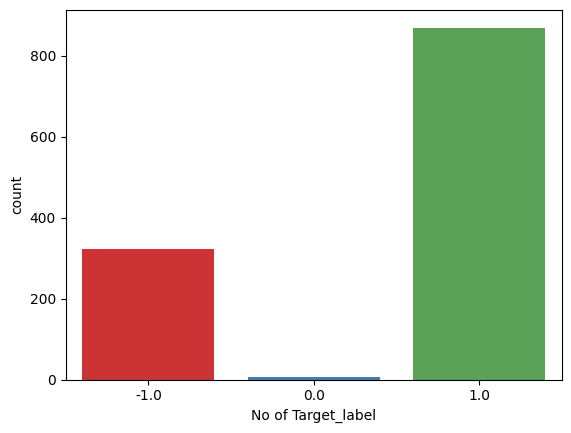

In [ ]:
ax = sns.countplot(x = 'Target_label', data = df_new, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cfd52dc-a542-4ebd-bf48-5f64d542324f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>